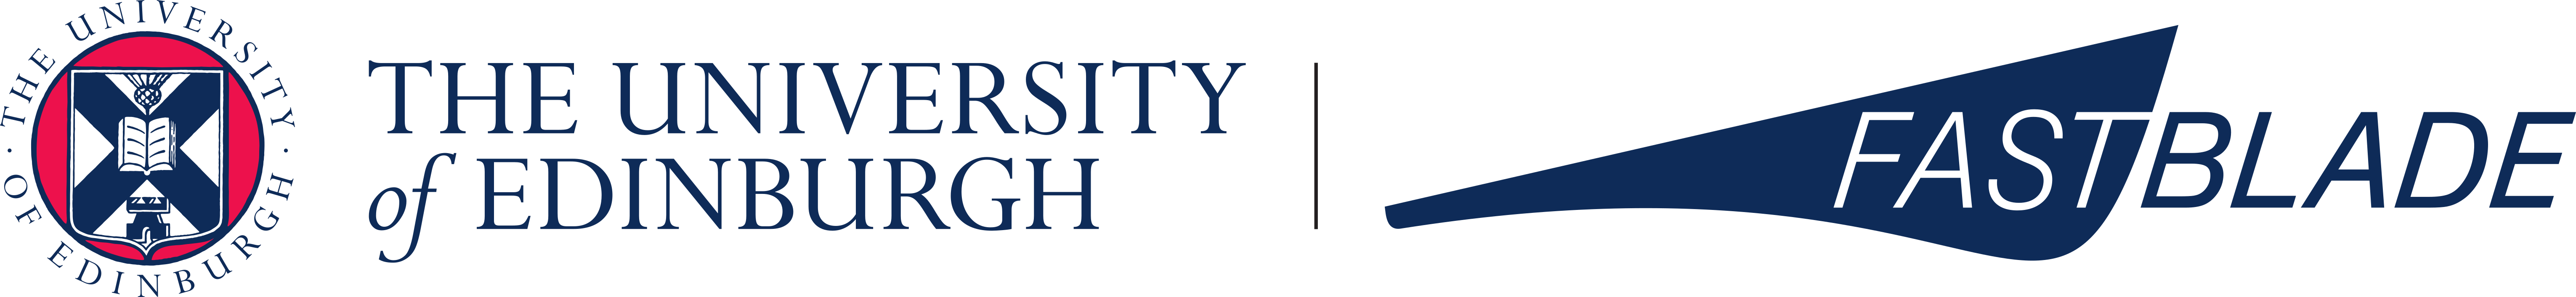

# Data Analysis

You will learn how to use the Pandas python library to analyse data from the FloWave facility at the UoE. 

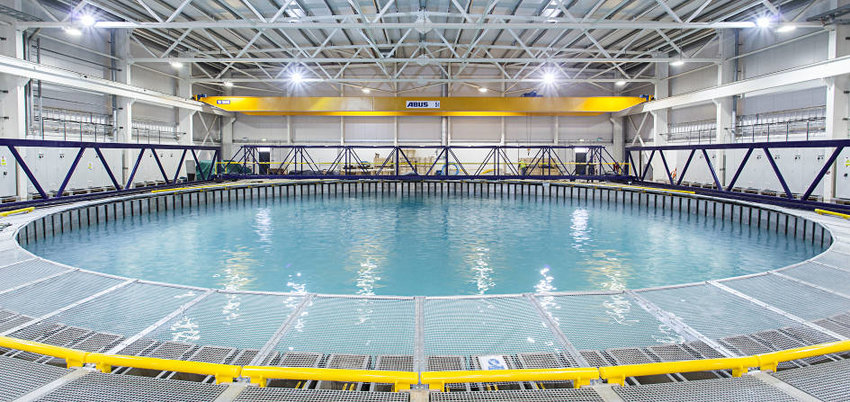

## Table of Contents
* [1.	Problem](#section_1)
* [2.	Plan](#section_2)
* [3.	Data](#section_3)
    * [3.1.	Loading libraries](#section_3_1)
    * [3.2.	Finding files](#section_3_2)
    * [3.3.	Read First files](#section_3_3)
    * [3.4.	Visualising Raw Data ](#section_3_4)
    * [3.5.	Convert Time Column into Time Data Type](#section_3_5)
    * [3.6.	Plotting Data against Time ](#section_3_6)
* [4.	Analysis (One File)](#section_4)
    * [4.1.	Do the computations - calculating angular velocity, tip speed ratio and power capture coefficient.](#section_4_1)
    * [4.2.	Calculate absolute mean values.](#section_4_2)
* [5.	Analysis (Multiple Files)](#section_5)
    * [5.1.	‘For’ loop to process all data (Read, Compute and Join)](#section_5_1)
    * [5.2.	Get final values.](#section_5_2)
    * [5.3.	Final plots](#section_5_3)
    * [5.4.	Calculate max value and report corresponding TSR](#section_5_4)
* [6.	Conclusion](#section_6)
    * [6.1.	Maximum power at the top ](#section_6_1)
* [7.	Extra Data Exploration](#section_7)
    * [7.1.	Statistical Exploration](#section_7_1)
    * [7.2.	Visual Exploration](#section_7_2)
* [8.	Extra Data Processing](#section_8)
    * [8.1.	Resample Data](#section_8_1)
    * [8.2.	Make a spreadsheet (excel cannot handle all the data).](#section_8_2)
* [9.	Data Challange.](#section_9)

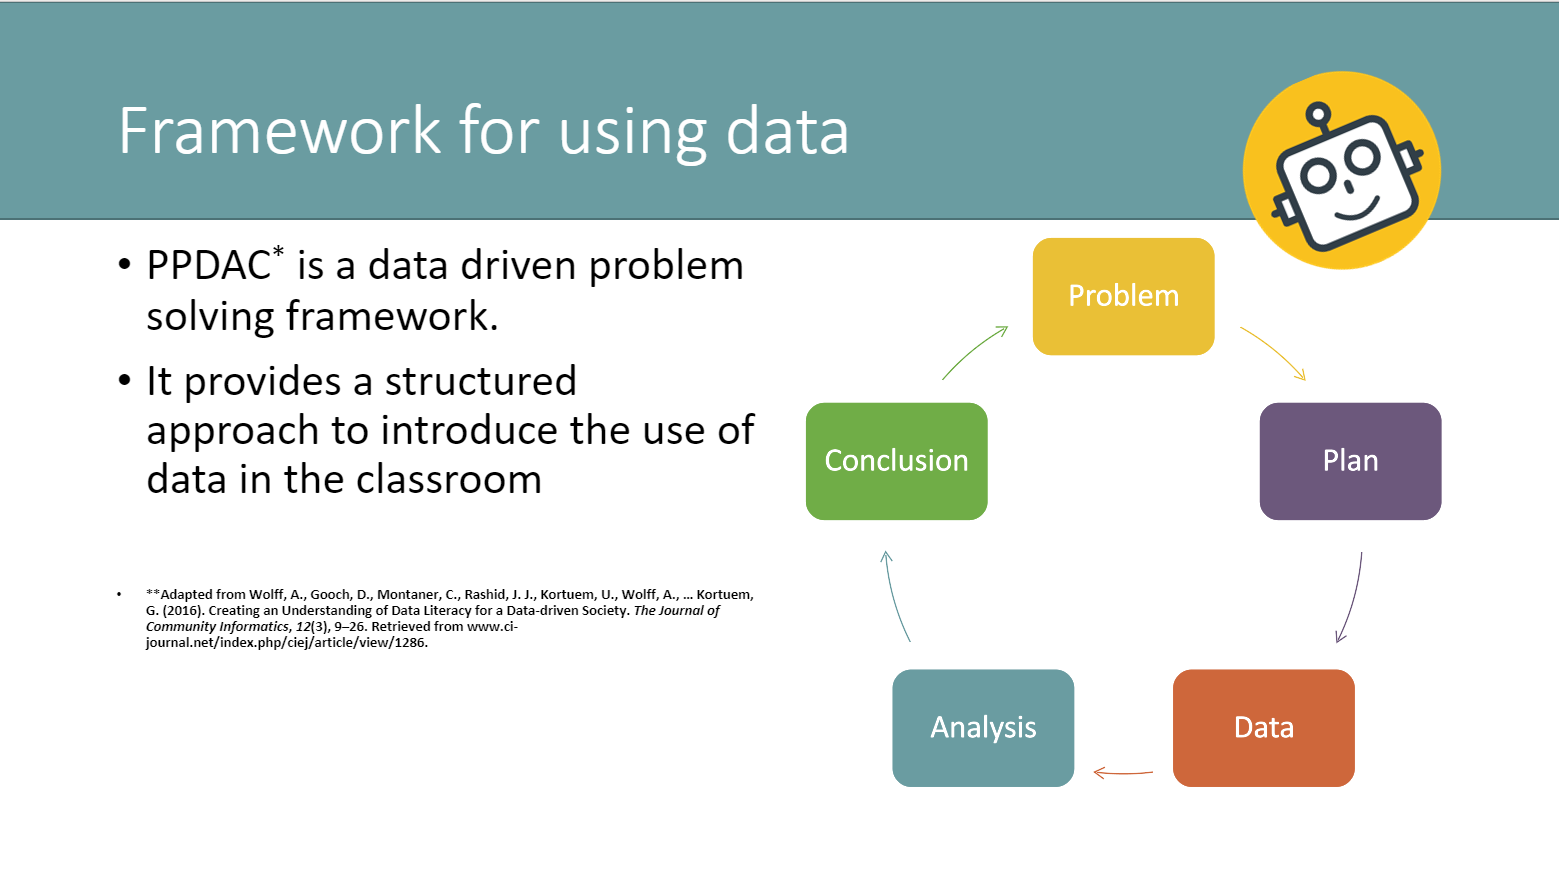

## 1. Problem  <a class="anchor" id="section_1"></a>

What is the maximum power output of the scaled tidal stream turbine?

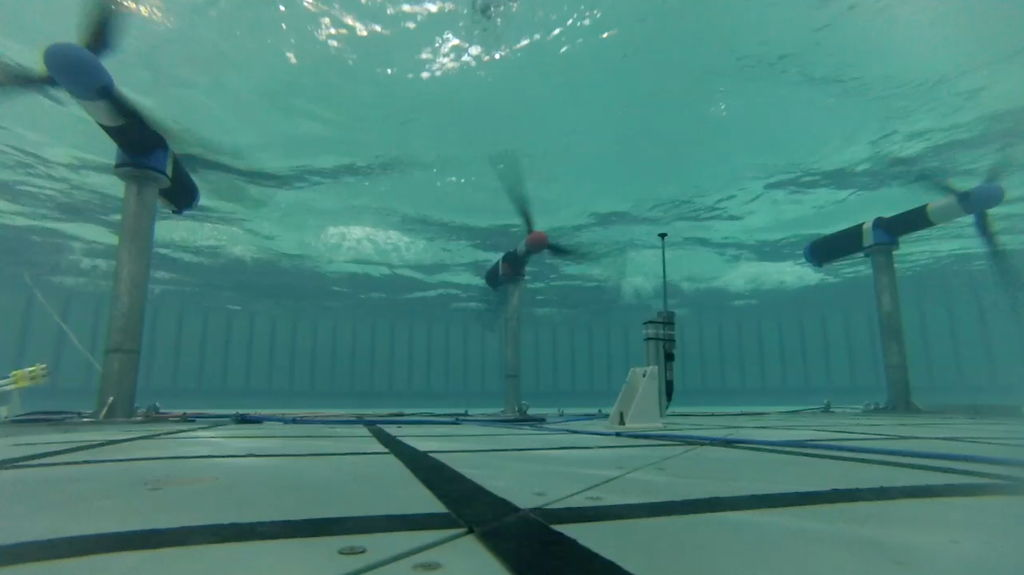

## 2. Plan  <a class="anchor" id="section_2"></a>

The plan to is wrangle and process a dataset consisting of 16 tidal turbine experiments. 
You will convert the data into non-dimensional power coefficients and tip speed ratios. Then we will calculate the averages and plot them to produce a power hill curve. Then we can determine the turbine operating speed that generates the maximum power. 
The steps are:
1.	Learn to import, visualise and analyse one file. 
2.	Setup ‘for’ loop to repeat step 1 for all files.
3.	Visualise power hill curve.
4.	Calculate max values.


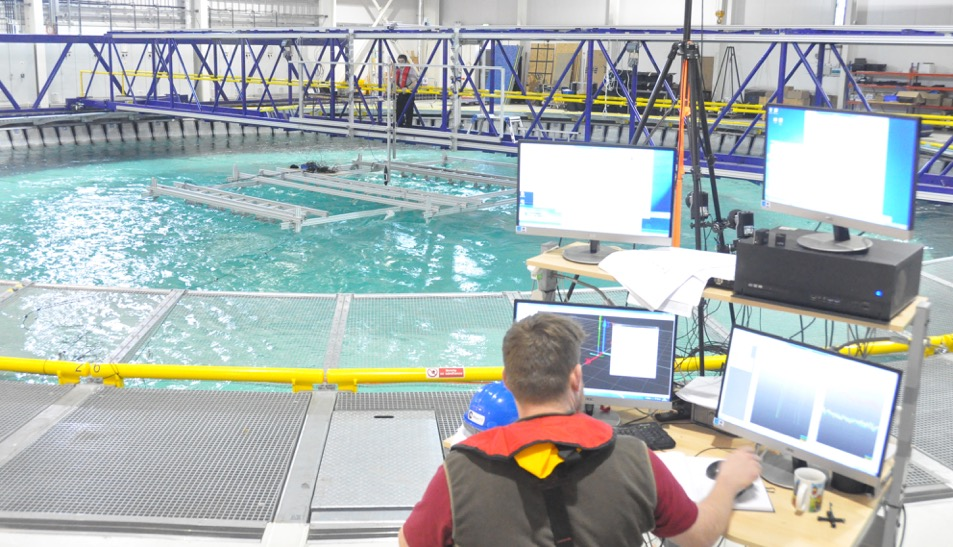

## 3. Data <a class="anchor" id="section_3"></a>

Data consist of 16 time series of experimental data of [Time, RPM, Torque] collected from a turbine in the FloWave tank. 

### 3.1.	Loading libraries <a class="anchor" id="section_3_1"></a>

Python works with many different libraries, each library allows us to perform a different task. In the Data Science world, one of the most popular and powerful libraries is Pandas (https://pandas.pydata.org/). In this notebook, we will use mainly this library to see how can we process, manipulate and easily analyse a lot of data.

In [1]:
# Pandas is similar to excel so you can work with Data Frames
import pandas as pd
#OS refers to the operating system
import os
#Get the pi constant value
from math import pi

### 3.2.	Finding files <a class="anchor" id="section_3_2"></a>

In the case we have many different files in one (our case) or many different directories, the first thing we need to do, is to retrieve all these documents.

In [2]:
#Get the list of files in the working directory
path = '.'
All_files=os.scandir(os.path.join(path,'Data'))

More information at https://docs.python.org/3/library/os.html#os.scandir

In [3]:
# Select just the TAXXX.csv files 
TA_files= [f for f in All_files if (f.name.startswith('TA') ) and (f.name.endswith('.csv'))]
print(TA_files)

[<DirEntry 'TA001.csv'>, <DirEntry 'TA002.csv'>, <DirEntry 'TA003.csv'>, <DirEntry 'TA004.csv'>, <DirEntry 'TA005.csv'>, <DirEntry 'TA006.csv'>, <DirEntry 'TA007.csv'>, <DirEntry 'TA008.csv'>, <DirEntry 'TA009.csv'>, <DirEntry 'TA010.csv'>, <DirEntry 'TA011.csv'>, <DirEntry 'TA012.csv'>, <DirEntry 'TA013.csv'>, <DirEntry 'TA014.csv'>, <DirEntry 'TA015.csv'>, <DirEntry 'TA016.csv'>]


### 3.3.	Read First files <a class="anchor" id="section_3_3"></a>

We will start to analyze one single file, and we will try to extract the data inside this file. The idea is to figure out what type of data we are dealing with, the integrity of the data, and make ourselves a general idea of the data.

In [4]:
#Read the first file
# Python reads from 0
data_exp=pd.read_csv(TA_files[0])
#Explore the data
data_exp.head()

,Time,RPM,TRQU
0,0.000000,inf,-10.994894
1,0.003906,90.043968,-11.167003
2,0.007812,89.062500,-10.904742
3,0.011719,89.956078,-11.220274
4,0.015625,90.043968,-11.585353


More information how to read csv https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html  <br />
More information head https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

In [5]:
#Explore the data type
data_exp.dtypes

Time    float64
RPM     float64
TRQU    float64
dtype: object

More information dtypes https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes

In [6]:
#Check how many data point we have (rows, columns)
data_exp.shape

(76800, 3)

In [7]:
#See the basic information of the Data frame
data_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76800 entries, 0 to 76799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    76800 non-null  float64
 1   RPM     76800 non-null  float64
 2   TRQU    76800 non-null  float64
dtypes: float64(3)
memory usage: 1.8 MB


In [8]:
# Define Infinity values as "Not a Number".
pd.set_option('use_inf_as_na', True)

In [9]:
#Delete all Na (Not a Number) values
data_exp.dropna(inplace=True)

In [10]:
#Check how many data point we have rows, columns
data_exp.shape

(76799, 3)

In [11]:
#Describe the Data Frame
data_exp.describe()

,Time,RPM,TRQU
count,76799.000000,76799.000000,76799.000000
mean,150.000000,89.815969,-13.368563
std,86.601977,1.381705,1.964682
min,0.003906,83.274857,-40.590091
25%,75.001953,89.062500,-14.175920
50%,150.000000,90.000000,-13.384668
75%,224.998047,90.937500,-12.589319
max,299.996094,95.625000,15.841724


### 3.4.	Visualising Raw Data  <a class="anchor" id="section_3_4"></a>

<AxesSubplot:>

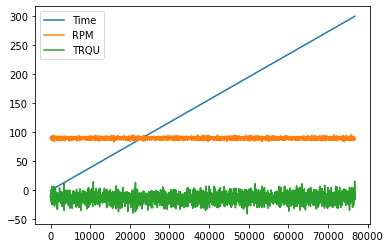

In [12]:
data_exp.plot()

### 3.5.	Convert Time Column into Time Data Type <a class="anchor" id="section_3_5"></a>

In [13]:
#Lests convert Column "Time" into seconds
data_exp['Time']=pd.to_timedelta(data_exp['Time'], unit='seconds') 

In [14]:
#Make the time to be our index
data_exp.set_index('Time',inplace=True)

In [15]:
data_exp.head()

,RPM,TRQU
Time,,
0 days 00:00:00.003906250,90.043968,-11.167003
0 days 00:00:00.007812500,89.062500,-10.904742
0 days 00:00:00.011718750,89.956078,-11.220274
0 days 00:00:00.015625,90.043968,-11.585353
0 days 00:00:00.019531250,89.956078,-11.585353


### 3.6.	Plotting Data against Time  <a class="anchor" id="section_3_5"></a>

<AxesSubplot:xlabel='Time'>

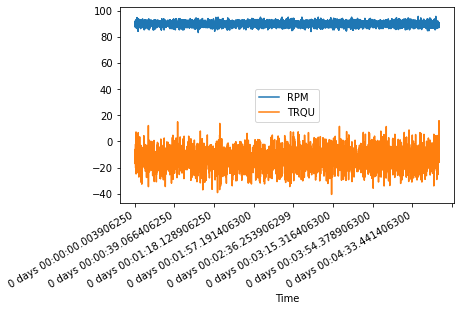

In [16]:
data_exp.plot()

If you want to call a single variable inside the data frame, you have first to call the data frame and follow the name of the variable you are entered in.

<AxesSubplot:xlabel='Time'>

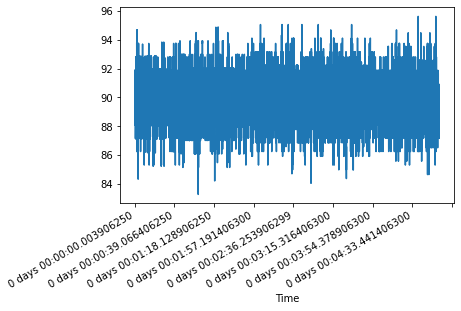

In [17]:
data_exp.RPM.plot()

<AxesSubplot:xlabel='Time'>

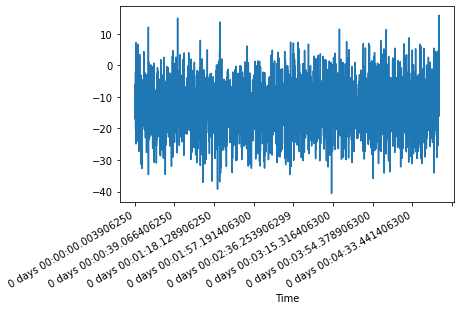

In [18]:
data_exp.TRQU.plot()

## 4.	Analysis <a class="anchor" id="section_4"></a>

RPM needs to be converted to angular velocity then into the tip speed. This is then presented as a ratio of the flow speed which was 0.8m/s.
The power is calculated by multiplying the torque by the angular velocity P = T x w.
Convert Power to Cp = Captured/ Available Power

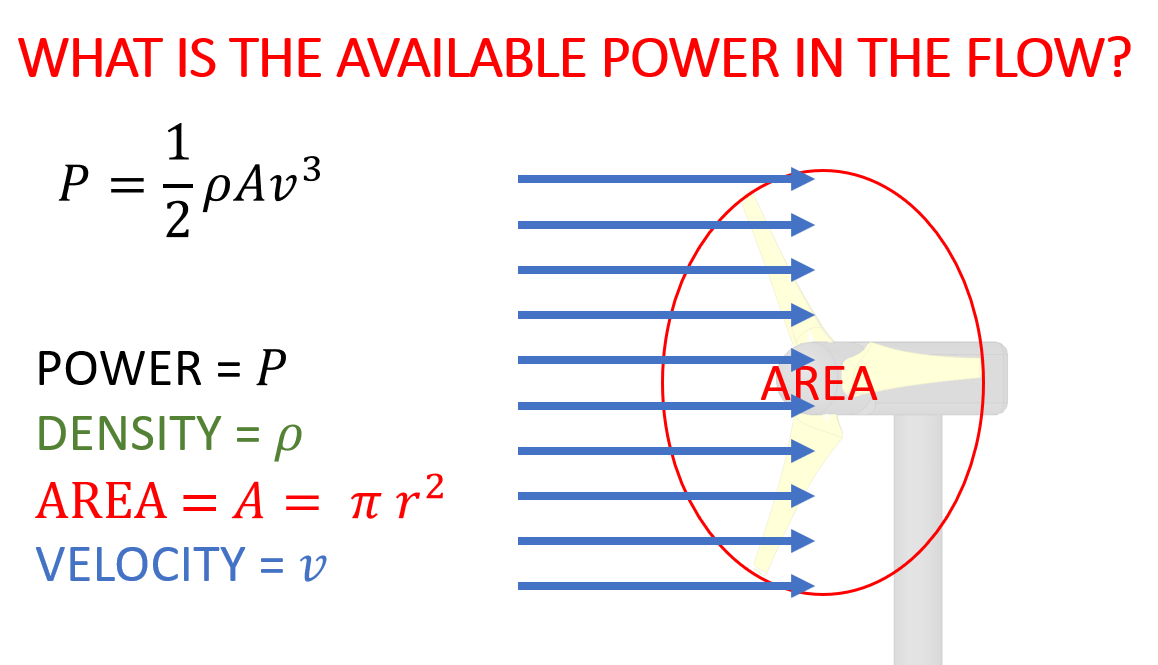

### Our Data:

<style>
table {margin-left: 0 !important;}
</style>

| Variable | Value | Units |
| :- | --- | --- |
| Radius | 0.6 | m |
| Fluid Velocity | 0.8 | m/s |
| Fluid Density | 1000 | kg/$m^{3}$ |

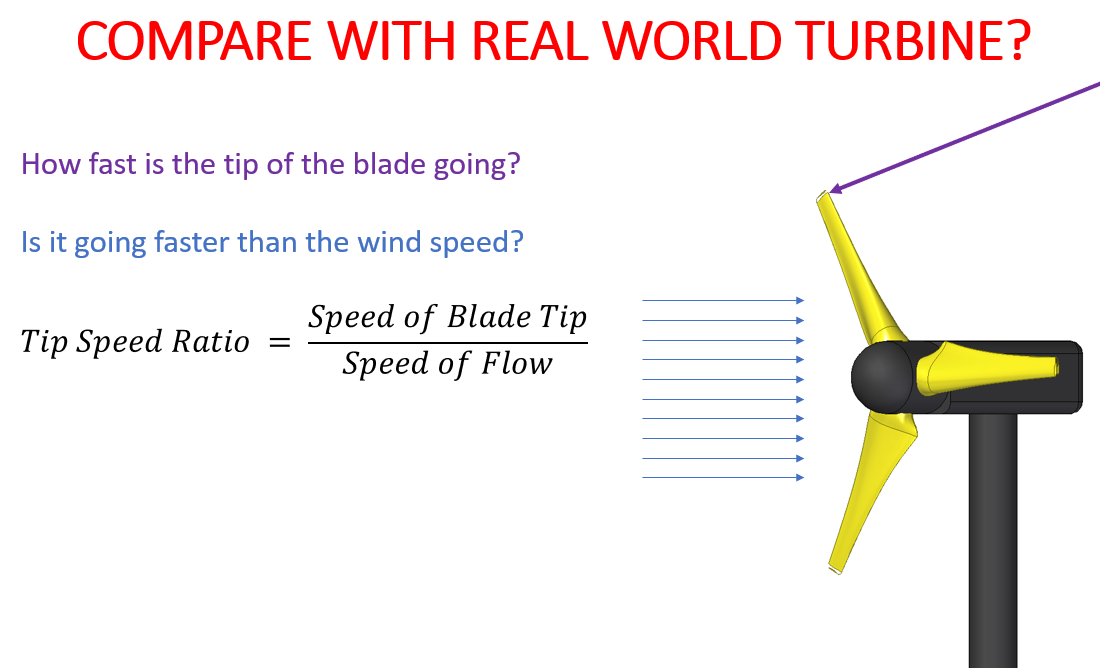

In [19]:
#Define our variables
r=0.6
v=0.8
vs=1000
area=pi*r**2

### 4.1.	Do the computations - calculating angular velocity, tip speed ratio and power capture coefficient.  <a class="anchor" id="section_4_1"></a>

In [20]:
#Create a new colums
#RPM converted to angular velocity
data_exp['Rad_per_s']=data_exp.RPM*2*pi/60 #60 seconds
data_exp['Rad_per_s'].head()

Time
0 days 00:00:00.003906250    9.429382
0 days 00:00:00.007812500    9.326603
0 days 00:00:00.011718750    9.420178
0 days 00:00:00.015625       9.429382
0 days 00:00:00.019531250    9.420178
Name: Rad_per_s, dtype: float64

In [21]:
data_exp['Tip_Speed']=r*data_exp['Rad_per_s']

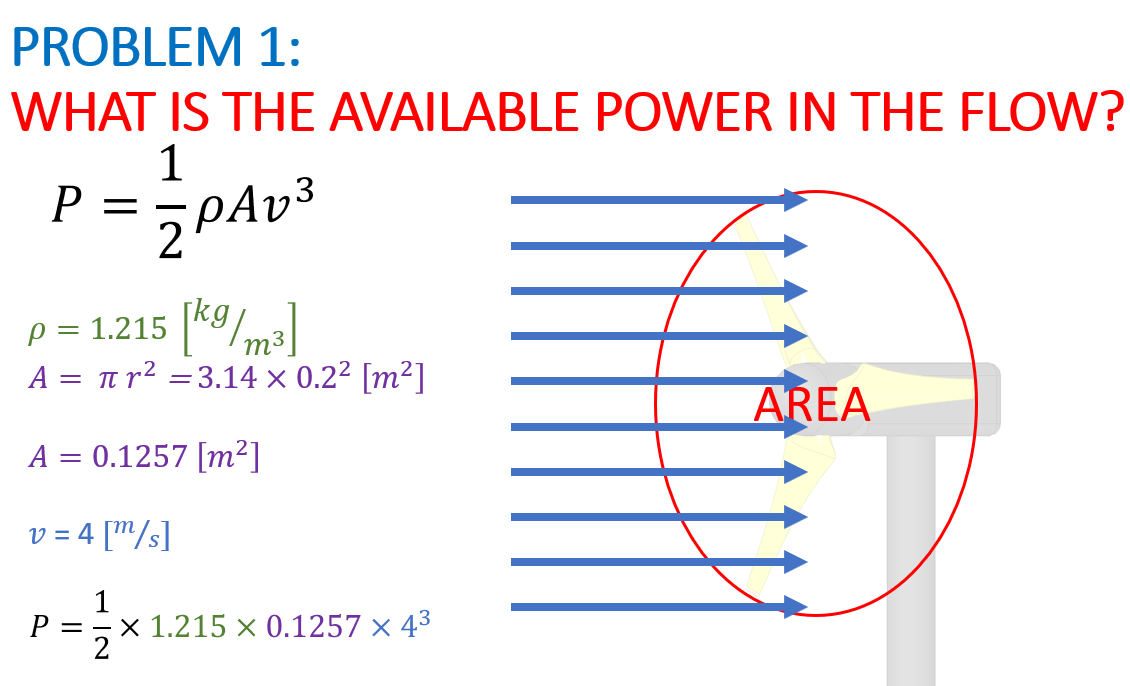

In [22]:
data_exp['Power']=data_exp['Rad_per_s']*data_exp['TRQU'].abs()

In [23]:
data_exp['Cp']=data_exp['Power']/(0.5*vs*area*v**3)

In [24]:
data_exp.head()

,RPM,TRQU,Rad_per_s,Tip_Speed,Power,Cp
Time,,,,,,
0 days 00:00:00.003906250,90.043968,-11.167003,9.429382,5.657629,105.297938,0.363687
0 days 00:00:00.007812500,89.062500,-10.904742,9.326603,5.595962,101.704205,0.351274
0 days 00:00:00.011718750,89.956078,-11.220274,9.420178,5.652107,105.696987,0.365065
0 days 00:00:00.015625,90.043968,-11.585353,9.429382,5.657629,109.242721,0.377312
0 days 00:00:00.019531250,89.956078,-11.585353,9.420178,5.652107,109.136091,0.376943


### 4.2.	Calculate absolute mean values.  <a class="anchor" id="section_4_2"></a>

In [25]:
data_exp.abs().mean()

RPM           89.815969
TRQU          13.380836
Rad_per_s      9.405506
Tip_Speed      5.643304
Power        125.859835
Cp             0.434705
dtype: float64

## 5.	Analysis (multiple files).  <a class="anchor" id="section_5"></a>

###  5.1.	‘For’ loop to process all data (Read, Compute and Join).  <a class="anchor" id="section_5_1"></a>

If you want to call a single variable inside the data frame you have first to call the data frame and follow by the name of the variable you are entered in. You can call a variable in 2 ways call DataFrame + dot + variable name (df.RPM) or you can do DataFrame +['variable name'] df['RPM'] you can use ' or " The first option works just with variables that do not have any space inside their name, the second one work with any type of name.

In [26]:
All_files = []
#Create sufix value
i=1
#Iterate throw all the files
for filename in TA_files:
    #read the file
    df = pd.read_csv(filename,index_col=['Time'])
    ######START CODE#####
    df.dropna(inplace=True)
    df['Rad_per_s']=df['RPM']*2*pi/60
    df['Tip_Speed']=r*df['Rad_per_s']
    df['TSR']=df['Tip_Speed']/v
    df['Power']=abs(df.TRQU*df.Rad_per_s)
    df['Cp']=df['Power']/(0.5*vs*pi*r**2*v**3)
    #####END CODE#####
    #Append the file addinf the suffix
    All_files.append(df.add_suffix('_'+str(i)))
    #Increas the sufix
    i+=1
#Join all the files into one
frame = pd.concat(All_files, axis=1)

In [27]:
frame.head()

,RPM_1,TRQU_1,Rad_per_s_1,Tip_Speed_1,TSR_1,Power_1,Cp_1,RPM_2,TRQU_2,Rad_per_s_2,...,TSR_15,Power_15,Cp_15,RPM_16,TRQU_16,Rad_per_s_16,Tip_Speed_16,TSR_16,Power_16,Cp_16
Time,,,,,,,,,,,,,,,,,,,,,
0.003906,90.043968,-11.167003,9.429382,5.657629,7.072037,105.297938,0.363687,51.764706,-20.127816,5.420787,...,6.037748,108.869726,0.376023,103.657585,-9.699250,10.854997,6.512998,8.141248,105.285331,0.363643
0.007812,89.062500,-10.904742,9.326603,5.595962,6.994952,101.704205,0.351274,50.625000,-21.226032,5.301438,...,6.037748,97.155702,0.335564,104.470596,-9.363229,10.940135,6.564081,8.205101,102.434992,0.353799
0.011719,89.956078,-11.220274,9.420178,5.652107,7.065134,105.696987,0.365065,51.562500,-20.648239,5.399612,...,6.037748,90.060110,0.311057,104.062500,-9.846772,10.897400,6.538440,8.173050,107.304205,0.370616
0.015625,90.043968,-11.585353,9.429382,5.657629,7.072037,109.242721,0.377312,50.625000,-20.185186,5.301438,...,5.964117,91.373217,0.315592,103.657585,-10.383959,10.854997,6.512998,8.141248,112.717838,0.389314
0.019531,89.956078,-11.585353,9.420178,5.652107,7.065134,109.136091,0.376943,50.625000,-20.078642,5.301438,...,6.111379,97.539141,0.336889,105.000000,-9.506653,10.995574,6.597345,8.246681,104.531106,0.361038


In [28]:
frame.shape

(76799, 112)

###  5.2.	Get final values. <a class="anchor" id="section_5_2"></a>

In [29]:
#Get all the mean values
mean_val=frame.abs().mean()

In [30]:
mean_val

RPM_1            89.815969
TRQU_1           13.380836
Rad_per_s_1       9.405506
Tip_Speed_1       5.643304
TSR_1             7.054130
                   ...    
Rad_per_s_16     10.752537
Tip_Speed_16      6.451522
TSR_16            8.064403
Power_16        115.700474
Cp_16             0.399616
Length: 112, dtype: float64

In [31]:
#Get the TSR and Cp columns
TSR_col=[c for c in frame.columns if ('TSR'  in c) ]
Cp_col=[c for c in frame.columns if ('Cp'  in c) ]

In [32]:
TSR_col,Cp_col

(['TSR_1',
  'TSR_2',
  'TSR_3',
  'TSR_4',
  'TSR_5',
  'TSR_6',
  'TSR_7',
  'TSR_8',
  'TSR_9',
  'TSR_10',
  'TSR_11',
  'TSR_12',
  'TSR_13',
  'TSR_14',
  'TSR_15',
  'TSR_16'],
 ['Cp_1',
  'Cp_2',
  'Cp_3',
  'Cp_4',
  'Cp_5',
  'Cp_6',
  'Cp_7',
  'Cp_8',
  'Cp_9',
  'Cp_10',
  'Cp_11',
  'Cp_12',
  'Cp_13',
  'Cp_14',
  'Cp_15',
  'Cp_16'])

In [33]:
final=pd.DataFrame({'TSR':mean_val[TSR_col].values,'Cp':mean_val[Cp_col].values})

In [34]:
final.round(2)

,TSR,Cp
0,7.05,0.43
1,4.04,0.39
2,11.09,0.25
3,5.55,0.44
4,6.06,0.44
5,3.53,0.27
6,13.12,0.09
7,9.07,0.37
8,4.54,0.43
9,10.08,0.31


### 5.3.	Final plots <a class="anchor" id="section_5_3"></a>

![Model_4](Images/Model_4.png)

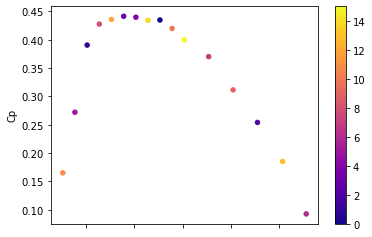

In [35]:
ax=final.plot.scatter(x='TSR', y='Cp',c=final.index,colormap='plasma',xlabel='TSR')

More color maps at https://matplotlib.org/stable/tutorials/colors/colormaps.html

<AxesSubplot:title={'center':'Final Plot'}, xlabel='TSR', ylabel='Cp'>

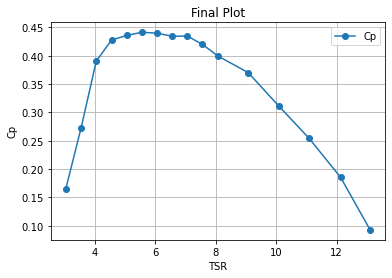

In [36]:
final.sort_values(by=['TSR']).plot(x='TSR', y='Cp',title='Final Plot',grid=True,ylabel='Cp',marker='o')

### 5.4.	Calculate max value and report corresponding TSR. <a class="anchor" id="section_5_4"></a>

In [37]:
final.Cp.max()

0.44134521654487785

In [38]:
final.TSR[final.Cp.idxmax()]

5.553937320474309

## 6.	Conclusion. <a class="anchor" id="section_6"></a>

### 6.1.	Maximum power at the top . <a class="anchor" id="section_6_1"></a>

In [39]:
print('The maximum power coefficient is', final.Cp.max().round(2), 'at a tip speed ratio of', final.TSR[final.Cp.idxmax()].round(2))

The maximum power coefficient is 0.44 at a tip speed ratio of 5.55


## 7.	Extra Data Exploration.  <a class="anchor" id="section_7"></a>

### 7.1.	Statistical Exploration.  <a class="anchor" id="section_7_1"></a>

In [40]:
frame.describe().round(2)

,RPM_1,TRQU_1,Rad_per_s_1,Tip_Speed_1,TSR_1,Power_1,Cp_1,RPM_2,TRQU_2,Rad_per_s_2,...,TSR_15,Power_15,Cp_15,RPM_16,TRQU_16,Rad_per_s_16,Tip_Speed_16,TSR_16,Power_16,Cp_16
count,76799.00,76799.00,76799.00,76799.00,76799.00,76799.00,76799.00,76799.00,76799.00,76799.00,...,76799.00,76799.00,76799.00,76799.00,76799.00,76799.00,76799.00,76799.00,76799.00,76799.00
mean,89.82,-13.37,9.41,5.64,7.05,125.86,0.43,51.43,-20.99,5.39,...,6.56,125.71,0.43,102.68,-10.74,10.75,6.45,8.06,115.70,0.40
std,1.38,1.96,0.14,0.09,0.11,17.83,0.06,1.37,2.64,0.14,...,0.15,21.53,0.07,1.24,1.89,0.13,0.08,0.10,19.27,0.07
min,83.27,-40.59,8.72,5.23,6.54,0.40,0.00,44.06,-50.66,4.61,...,5.87,0.04,0.00,96.56,-40.56,10.11,6.07,7.58,0.21,0.00
25%,89.06,-14.18,9.33,5.60,6.99,118.21,0.41,50.62,-22.36,5.30,...,6.48,113.62,0.39,102.19,-11.54,10.70,6.42,8.03,106.96,0.37
50%,90.00,-13.38,9.42,5.65,7.07,125.92,0.43,51.56,-21.04,5.40,...,6.55,125.69,0.43,102.72,-10.74,10.76,6.45,8.07,115.46,0.40
75%,90.94,-12.59,9.52,5.71,7.14,133.49,0.46,52.50,-19.66,5.50,...,6.70,137.71,0.48,103.12,-9.95,10.80,6.48,8.10,124.13,0.43
max,95.62,15.84,10.01,6.01,7.51,386.54,1.34,57.64,8.85,6.04,...,7.29,351.80,1.22,107.81,15.59,11.29,6.77,8.47,426.69,1.47


### 7.2.	Visual Exploration.  <a class="anchor" id="section_7_2"></a>

You can find more information about histograms in https://en.wikipedia.org/wiki/Histogram

array([[<AxesSubplot:title={'center':'RPM'}>,
        <AxesSubplot:title={'center':'TRQU'}>],
       [<AxesSubplot:title={'center':'Rad_per_s'}>,
        <AxesSubplot:title={'center':'Tip_Speed'}>],
       [<AxesSubplot:title={'center':'Power'}>,
        <AxesSubplot:title={'center':'Cp'}>]], dtype=object)

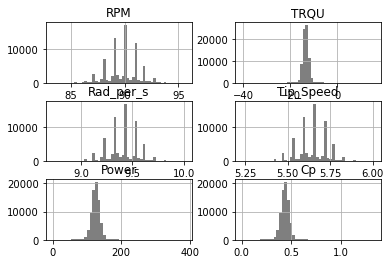

In [41]:
data_exp.hist(color="k", alpha=0.5, bins=50)

We use diff to compute the difference of 2 consecutive values to detect possible outliers.  <br /> 
Information about outliers https://en.wikipedia.org/wiki/Outlier#:~:text=In%20statistics%2C%20an%20outlier%20is,serious%20problems%20in%20statistical%20analyses.  <br /> 
Infromation about diff function https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html

array([[<AxesSubplot:title={'center':'RPM'}>,
        <AxesSubplot:title={'center':'TRQU'}>],
       [<AxesSubplot:title={'center':'Rad_per_s'}>,
        <AxesSubplot:title={'center':'Tip_Speed'}>],
       [<AxesSubplot:title={'center':'Power'}>,
        <AxesSubplot:title={'center':'Cp'}>]], dtype=object)

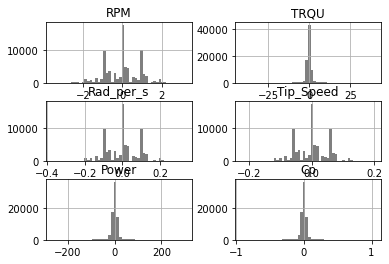

In [42]:
#Plot the difference between 2 consecutive values
data_exp.diff().hist(color="k", alpha=0.5, bins=50)

We read normally read from left all the commands, so in the next case, we ask to process the "data_exp" data frame, by applying the diff command. Because the diff could be positive or negative, then we ask for the absolute value of the diff. After that, we ask for the Index in which we have the maximum diference.

In [43]:
#Lest find where these big jumps occurs
data_exp.diff().abs().idxmax()

RPM         0 days 00:02:34.917968800
TRQU        0 days 00:01:23.585937500
Rad_per_s   0 days 00:02:34.917968800
Tip_Speed   0 days 00:02:34.917968800
Power       0 days 00:01:23.585937500
Cp          0 days 00:01:23.585937500
dtype: timedelta64[ns]

In [44]:
#Lest find where the value of those big jumps
data_exp.diff().max()

RPM            3.176476
TRQU          39.678812
Rad_per_s      0.332640
Tip_Speed      0.199584
Power        301.117891
Cp             1.040026
dtype: float64

In [45]:
#Put the values into a variable
Ind_max=data_exp.diff().abs().idxmax()

<AxesSubplot:xlabel='Time'>

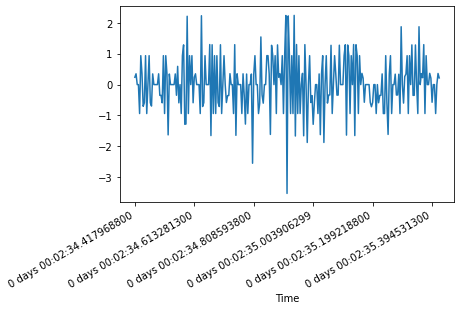

In [46]:
#Plot 0.5 seconds before and after the max values
data_exp.diff().RPM[Ind_max[0]-pd.Timedelta(0.5,'seconds'):Ind_max[0]+pd.Timedelta(0.5,'seconds')].plot()

<AxesSubplot:xlabel='Time'>

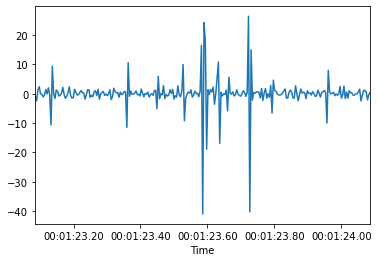

In [47]:
#Plot 10 seconds before and after the max values
data_exp.diff().TRQU[Ind_max[1]-pd.Timedelta(0.5,'seconds'):Ind_max[1]+pd.Timedelta(0.5,'seconds')].plot()

<AxesSubplot:ylabel='Frequency'>

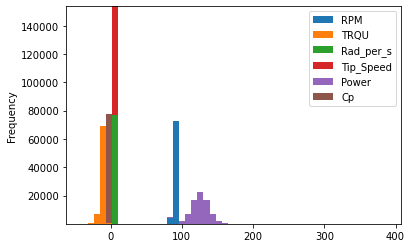

In [48]:
data_exp.plot.hist(stacked=True, bins=50)

More information of boxplot https://en.wikipedia.org/wiki/Box_plot

<AxesSubplot:>

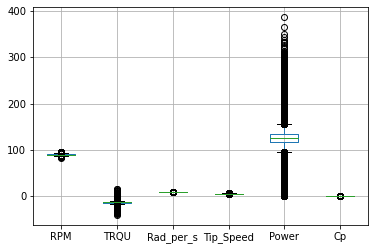

In [49]:
data_exp.boxplot()

array([[<AxesSubplot:xlabel='RPM', ylabel='RPM'>,
        <AxesSubplot:xlabel='TRQU', ylabel='RPM'>,
        <AxesSubplot:xlabel='Rad_per_s', ylabel='RPM'>,
        <AxesSubplot:xlabel='Tip_Speed', ylabel='RPM'>,
        <AxesSubplot:xlabel='Power', ylabel='RPM'>,
        <AxesSubplot:xlabel='Cp', ylabel='RPM'>],
       [<AxesSubplot:xlabel='RPM', ylabel='TRQU'>,
        <AxesSubplot:xlabel='TRQU', ylabel='TRQU'>,
        <AxesSubplot:xlabel='Rad_per_s', ylabel='TRQU'>,
        <AxesSubplot:xlabel='Tip_Speed', ylabel='TRQU'>,
        <AxesSubplot:xlabel='Power', ylabel='TRQU'>,
        <AxesSubplot:xlabel='Cp', ylabel='TRQU'>],
       [<AxesSubplot:xlabel='RPM', ylabel='Rad_per_s'>,
        <AxesSubplot:xlabel='TRQU', ylabel='Rad_per_s'>,
        <AxesSubplot:xlabel='Rad_per_s', ylabel='Rad_per_s'>,
        <AxesSubplot:xlabel='Tip_Speed', ylabel='Rad_per_s'>,
        <AxesSubplot:xlabel='Power', ylabel='Rad_per_s'>,
        <AxesSubplot:xlabel='Cp', ylabel='Rad_per_s'>],
       [<Axes

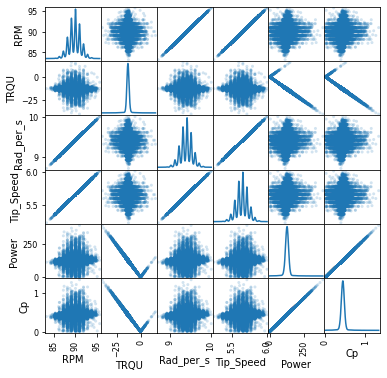

In [50]:
pd.plotting.scatter_matrix(data_exp,alpha=0.2, figsize=(6, 6), diagonal="kde")

For more plots check https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

## 8.	Extra Data Processing.  <a class="anchor" id="section_8"></a>

### 8.1.	Resample Data  <a class="anchor" id="section_8_1"></a>

### Resample Data <a class="anchor" id="section_1_5"></a>

In [51]:
data_exp.resample('1S').mean()

,RPM,TRQU,Rad_per_s,Tip_Speed,Power,Cp
Time,,,,,,
0 days 00:00:00.003906250,89.692392,-11.202924,9.392565,5.635539,105.236988,0.363476
0 days 00:00:01.003906250,90.303957,-11.287820,9.456608,5.673965,107.300486,0.370603
0 days 00:00:02.003906250,90.080586,-13.033519,9.433217,5.659930,123.001339,0.424832
0 days 00:00:03.003906250,89.890164,-12.288385,9.413276,5.647966,116.174011,0.401251
0 days 00:00:04.003906250,90.278315,-13.369821,9.453923,5.672354,126.666793,0.437492
...,...,...,...,...,...,...
0 days 00:04:55.003906250,90.081341,-13.092642,9.433296,5.659978,123.510988,0.426593
0 days 00:04:56.003906250,90.106774,-13.217369,9.435959,5.661576,125.066883,0.431966
0 days 00:04:57.003906250,90.019026,-14.051275,9.426770,5.656062,132.743762,0.458481


<AxesSubplot:xlabel='Time'>

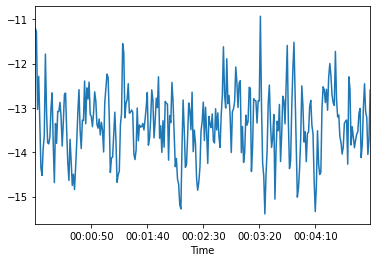

In [52]:
data_exp.TRQU.resample('1S').mean().plot()

### 8.2.	Make a spreadsheet (excel cannot handle all the data).  <a class="anchor" id="section_8_2"></a>

## 9.	Data Challenge.  <a class="anchor" id="section_8_3"></a>

1. Explore if there is any annomaly in the join files data frame.  
2. Resample for all the files at the same time.
3. Export the resampled data frame into excel. 

### We hope you like it

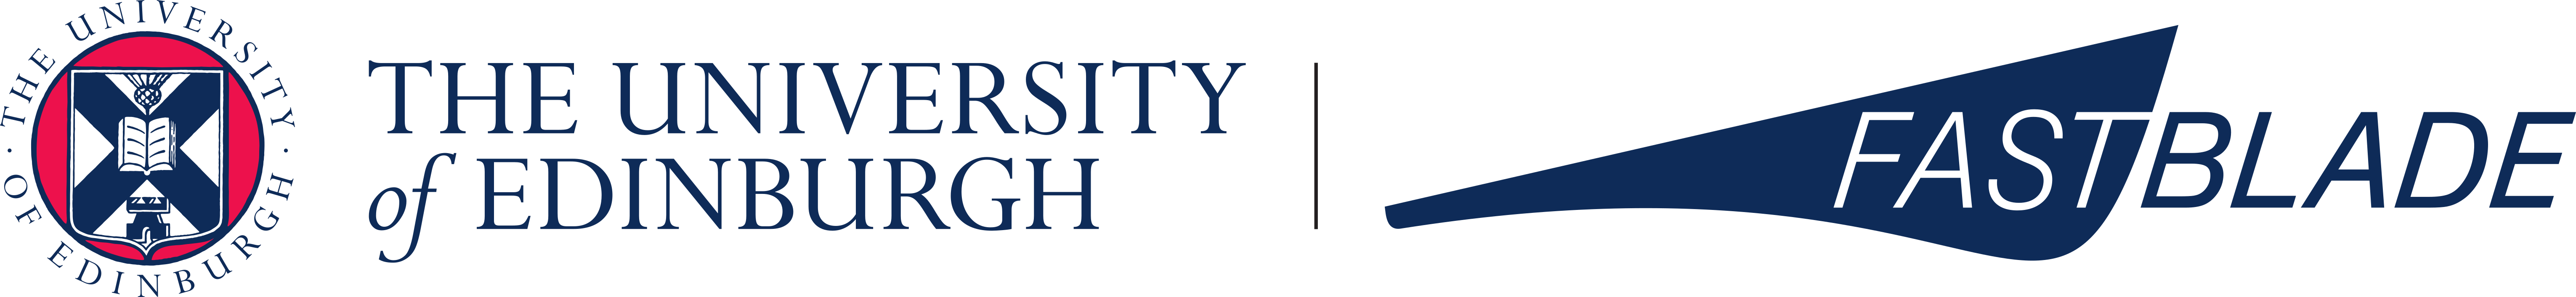